
# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
La base de données soumis à notre analyse contient les informations sur 10 000 films obtnues auprès de `Tthe Movie Database (TMDb)`. Elle est constituée de 21 colonnes : 
 1-id: identifiant du film
 2-imdb_id: identifiant IMDB du film
 3-poularity: score de popularité du film
 4-budget:le budget du film
 5- revenue: le revenue du film
 6-genres: le genre du film
 7- original_title: le tire original
 8-cast: les acteurs 
 9-homepage: le site du film
 10-director: directeur 
 11-overview: un apperçu
 12-runtime: durée du film
 13-release_year: année de réalisation
 14- release_date: date de réalisation 
 15- tagline: titre
 16-vote_count: vote des consommateurs
 17- vote_average: moyenne des votes
 18-budget_adj: budget_déflaté
 19- revenue_adj: revenu déflaté
 20-production_companies: maison de production
 21-keywords: les mots clefs


### Question(s) 
1- Quels sont les types de films les plus populaires d'une année à une autre? 
2-Quels relations entre popularité, le revenu et le budget?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
%matplotlib inline 
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling



In [3]:
# Importation de la base 
df=pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')

####  Inspection du jeu de données 
Maintenant que la base a été importée, essayons de commencer par les premières inspections à savoir les types des variables, valeurs manquantes etc.

In [4]:
# Nombre d'observations  ainsi que le nombre de variables dans la base
print('Le nombre de lingnes dans le jeu de données est:',df.shape[0]) 
print('Le nombre de colonnes  dans le jeu de données est:',df.shape[1])

Le nombre de lingnes dans le jeu de données est: 10866
Le nombre de colonnes  dans le jeu de données est: 21


####  Structure de la base de données 

In [5]:
# Les 21 premières lignes de la base (l'entête inclue) 
df.head(20)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [6]:
# les 20 dernières lignes de la base 
df.tail(20)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10846,17102,tt0059127,0.212716,0,0,Dracula: Prince of Darkness,Christopher Lee|Barbara Shelley|Andrew Keir|Fr...,NaN,Terence Fisher,"DEAD for Ten Years DRACULA, Prince of Darkness...",...,"Whilst vacationing in the Carpathian Mountain,...",90,Horror,Seven Arts Productions|Hammer Film Productions,1/9/66,16,5.7,1966,0.000000e+00,0.000000e+00
10847,28763,tt0060548,0.034555,0,0,Island of Terror,Peter Cushing|Edward Judd|Carole Gray|Eddie By...,NaN,Terence Fisher,How could they stop the devouring death...that...,...,A small island community is overrun with creep...,89,Science Fiction|Horror,Planet Film Productions|Protelco,6/20/66,13,5.3,1966,0.000000e+00,0.000000e+00
10848,2161,tt0060397,0.207257,5115000,12000000,Fantastic Voyage,Stephen Boyd|Raquel Welch|Edmond O'Brien|Donal...,NaN,Richard Fleischer,A Fantastic and Spectacular Voyage... Through ...,...,The science of miniaturization has been unlock...,100,Adventure|Science Fiction,Twentieth Century Fox Film Corporation,8/24/66,42,6.7,1966,3.436265e+07,8.061618e+07
10849,28270,tt0060445,0.206537,0,0,Gambit,Michael Caine|Shirley MacLaine|Herbert Lom|Joh...,NaN,Ronald Neame,Shirley MacLaine raises Michael Caine!,...,Harry Dean (Michael Caine) has a perfect plan ...,109,Action|Comedy|Crime,Universal Pictures,12/16/66,14,6.1,1966,0.000000e+00,0.000000e+00
10850,26268,tt0060490,0.202473,0,0,Harper,Paul Newman|Lauren Bacall|Julie Harris|Arthur ...,NaN,Jack Smight,Harper takes a case - and the payoff is murder.,...,Harper is a cynical private eye in the best tr...,121,Action|Drama|Thriller|Crime|Mystery,Warner Bros.,2/23/66,14,6.0,1966,0.000000e+00,0.000000e+00
10851,15347,tt0060182,0.342791,0,0,Born Free,Virginia McKenna|Bill Travers|Geoffrey Keen|Pe...,NaN,James Hill,From The Pages Of The Beloved Best Seller... A...,...,Born Free (1966) is an Open Road Films Ltd./Co...,95,Adventure|Drama|Action|Family|Foreign,High Road,6/22/66,15,6.6,1966,0.000000e+00,0.000000e+00
10852,37301,tt0060165,0.227220,0,0,A Big Hand for the Little Lady,Henry Fonda|Joanne Woodward|Jason Robards|Paul...,NaN,Fielder Cook,All the action you can take...all the adventur...,...,A naive traveler in Laredo gets involved in a ...,95,Western,Eden Productions Inc.,5/31/66,11,6.0,1966,0.000000e+00,0.000000e+00
10853,15598,tt0060086,0.163592,0,0,Alfie,Michael Caine|Shelley Winters|Millicent Martin...,NaN,Lewis Gilbert,Is any man an Alfie? Ask any girl!,...,The film tells the story of a young man who le...,114,Comedy|Drama|Romance,NaN,3/29/66,26,6.2,1966,0.000000e+00,0.000000e+00
10854,31602,tt0060232,0.146402,0,0,The Chase,Marlon Brando|Jane Fonda|Robert Redford|E.G. M...,NaN,Arthur Penn,The chase is on!,...,Most everyone in town thinks that Sheriff Cald...,135,Thriller|Drama|Crime,Horizon Pictures|Columbia Pictures Corporation,2/17/66,17,6.0,1966,0.000000e+00,0.000000e+00
10855,13343,tt0059221,0.141026,700000,0,The Ghost & Mr. Chicken,Don Knotts|Joan Staley|Liam Redmond|Dick Sarge...,NaN,Alan Rafkin,G-G-GUARANTEED! YOU'LL BE SCARED UNTIL YOU LAU...,...,Luther Heggs aspires to being a reporter for h...,90,Comedy|Family|Mystery|Romance,Universal Pictures,1/20/66,14,6.1,1966,4.702610e+06,0.000000e+00


In [7]:
# Types des variables, nombre de valeurs non nulles par variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

On remarque que les colonnes de cette base sont de trois types: _entier, chaîne de caractère et flottant_. Aussi, la base contient beaucoup de valeurs manquantes.  

Esssayons d'en savoir un peu plus sur le nombre de valeurs manquantes par variable.

In [8]:
# base de données bouléenne, où False signifie que la valeur est non nulle et True le contraire. 
# Inspiré par un travail similaire su kaggle
df_bool=df.isnull()
df_bool.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
#sum(df_bool.iloc[:,1:21].astype(bool))
#df_bool.dtypes
#sum(df_bool['homepage'])

In [10]:
# Nombre de valeurs nulles par variable
df_missing=pd.DataFrame(df_bool.sum(), columns=['Nb_NaN'])
df_missing

,Nb_NaN
id,0
imdb_id,10
popularity,0
budget,0
revenue,0
original_title,0
cast,76
homepage,7930
director,44
tagline,2824


In [11]:
# Nombre total de valeurs manquantes dans la base
sum(df_missing['Nb_NaN'])

13434

Ainsi, la base contient 13434 valeurs manquantes soit 5.89% des obsevations. 12  des 21 variables ne continnent pas de données manquantes. La variable `homepage` est celle qui contient le plus de données manquantes.

### Plus d'inspections
Détermination des observations dupliquées, des valeurs uniques ect.

In [12]:
# Nombre de duplication das la base de données 
sum(df.duplicated())

1

In [13]:
# Nombre de valeurs unique par variable
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

#### Résumé globale de la partie précédente: 
Les ispections effectuées précédemment sur le jeux de données montrent qu'il est nécessaire de procéder à certaines modifications afin de rendre la base un peu plus propre. Par exemple,`release_date` doit être transformer en format date. De même l'affichage de la colonne `genres` est trop confuse, il serait intéressant de la rendre un peu plus lisible en séparant les types de films. Un autre problème qu'il faudra prendre en compte dans le nettoyage des données est celui des `budjet, revenue, budget_adj et revenue_adj` qui sont nuls car cela n'est pas logique. 


### Data Cleaning


In [14]:
# Suppression des duplications 
df.drop_duplicates(keep='first', inplace=True)# inspiré par un travail similaire su kaggle
df.shape

(10865, 21)

In [15]:
# Conversion de "release_date" et "release_year	" en format date 
df['release_date']=pd.to_datetime(df['release_date'])


In [16]:
# Types de données après conversion
pd.DataFrame(df.dtypes, columns=['Types'])

,Types
id,int64
imdb_id,object
popularity,float64
budget,int64
revenue,int64
original_title,object
cast,object
homepage,object
director,object
tagline,object


*Attaquons maintenant un des gros problème du jeux de données: __les budgets et revenus nuls des films__*. 

In [17]:
# Nombre d'enrégistriments avec un revenu nul
#df[df['revenue']==0].count()
sum(df['revenue']==0)

6016

In [18]:
# Vérifions si le nombre de nuls pour revenue est le même pour revenue_adj
sum(df['revenue']==0)==sum(df['revenue_adj']==0)

True

In [19]:
# Nombre d'enrégistriments avec un budget nul
#df[df['budget']==0].count()
sum(df['budget']==0)

5696

In [20]:
# Vérifions si le nombre de nuls pour budget est le même pour budget_adj
sum(df['budget']==0)==sum(df['budget_adj']==0)

True

#### Commentaires: 
Il n'est pas logique que la réalisation d'un film n'ai pas de buget(coût nul) et n'ai occasionné aucun revenu. Nous interpreterons donc les zéros de ces variables comme des valeurs manquantes. La prochaine étape consistera à  remplacer  ces zéros par des valeurs manquantes.

In [21]:
# Inpiré par un travail similaire sur kaggle
df['revenue']=df['revenue'].replace(0,np.nan)
df['budget'] = df['budget'].replace(0, np.nan)
df['revenue_adj'] = df['revenue_adj'].replace(0, np.nan)
df['budget_adj'] = df['budget_adj'].replace(0, np.nan)

In [22]:
sum(df.isnull().sum())

36857

##### Traitement des valeurs manquantes
Les méthodes de traitement des valeurs manquantes telles que imputation par la moyenne ou la médiane, interpolation linéaire etc. semblent appropriées mais après une étape: constitution des groupes de films ayant des caractéristiques similaires et ensuite effectuer l'imputation au sein de chaque groupe. Cela fait appel aux méthodes de classification etc. qui ne sont pas aux programme. 
***Pour gérer les données manquantes, nous allons simplement les supprimées***
Mais la variable `homepage` ayant plus de **7000** de données manquantes, une  suppression  tenant compte de cette variable porrait réduire significativement la taille de l'échantillon. ***Il faudra dont l'exclure***

In [23]:
new_columns=(['id', 'imdb_id', 'popularity', 
              'budget', 'revenue', 'original_title',
              'cast',  'director', 'tagline', 
              'keywords', 'overview',
               'runtime', 'genres', 'production_companies', 'release_date',
                'vote_count', 'vote_average', 'release_year', 'budget_adj',
                'revenue_adj']
            )

In [24]:
df=df[new_columns]

In [25]:
df.dropna(inplace=True)
df.shape

(3445, 20)

Terminons la partie de néttoyage en rendant plus lisible la variable `genres`. Pour cela, on va considérer le type du film est la premier élément. Par exemple
pour *Action|Drama|Thriller|Crime|Mystery, le type sera __Action__*

In [26]:
df['genres']=(df['genres']).str.split("|", expand=True)[0]
df.head(20)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000.0,5.329505e+08,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",father-son relationship|rape|based on novel|mo...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western,Regency Enterprises|Appian Way|CatchPlay|Anony...,2015-12-25,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000.0,4.406035e+08,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,Reset the future,saving the world|artificial intelligence|cybor...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction,Paramount Pictures|Skydance Productions,2015-06-23,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000.0,5.953803e+08,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,Bring Him Home,based on novel|mars|nasa|isolation|botanist,"During a manned mission to Mars, Astronaut Mar...",141,Drama,Twentieth Century Fox Film Corporation|Scott F...,2015-09-30,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000.0,1.156731e+09,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",assistant|aftercreditsstinger|duringcreditssti...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family,Universal Pictures|Illumination Entertainment,2015-06-17,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000.0,8.537086e+08,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,Meet the little voices inside your head.,dream|cartoon|imaginary friend|animation|kid,"Growing up can be a bumpy road, and it's no ex...",94,Comedy,Walt Disney Pictures|Pixar Animation Studios|W...,2015-06-09,3935,8.0,2015,1.609999e+08,7.854116e+08


In [27]:
#Conversion de la variable 'id' en chaîne
df['id']=df['id'].astype(str)

In [28]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3445.000000,3.445000e+03,3.445000e+03,3445.000000,3445.000000,3445.000000,3445.000000,3.445000e+03,3.445000e+03
mean,1.268127,3.937705e+07,1.166624e+08,109.403193,573.448186,6.184383,2001.038897,4.680125e+07,1.484486e+08
std,1.533870,4.329284e+07,1.830498e+08,19.694966,915.245414,0.788992,11.379944,4.568443e+07,2.237649e+08
min,0.010335,1.000000e+00,2.000000e+00,26.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.861934e+00
25%,0.507078,1.100000e+07,1.697446e+07,96.000000,86.000000,5.700000,1995.000000,1.500000e+07,2.336535e+07
50%,0.876503,2.500000e+07,5.203489e+07,106.000000,238.000000,6.200000,2004.000000,3.245007e+07,7.121257e+07
75%,1.464555,5.100000e+07,1.382591e+08,119.000000,631.000000,6.700000,2010.000000,6.420938e+07,1.775120e+08
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis

Nos variables d'intérêt sont: `popularity, genres, revenue_adj et budget_adj`

### Quels sont les types de films les plus populaires d'une année à une autre? 

Interessons-nous  premièrement à la variable `genres`

In [29]:
#Les types de films distincts
df['genres'].nunique()

19

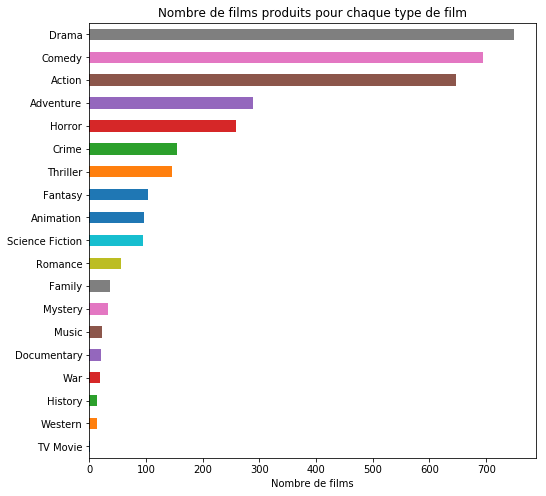

In [30]:
# Visualisation
df['genres'].value_counts().sort_values(ascending=True).plot(kind='barh',figsize=(8,8))
plt.title('Nombre de films produits pour chaque type de film')
plt.xlabel('Nombre de films');

Les films de type dramatiques semblent être les plus produits sur l'ensemble de la période.
*Pour répondre à la question posée, visualisons le nombre de film produits pour chaque type au fil des années.* 

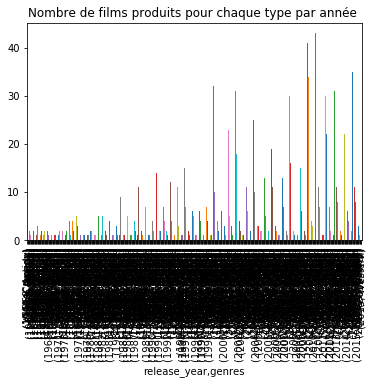

In [31]:
# Nombre de films produits chaque années pour chaque type de film
df.groupby('release_year')['genres'].value_counts().plot(kind='bar')
plt.title('Nombre de films produits pour chaque type par année ');

Comme on peut le constater, le graphique ci-dessous n'est pas du tout lisible. Afin d'améliorer la visualition des données, essayons de construire une variable `decenie` qui désigne la décénie dans laquelle le film a été réalisé. ***Cette idée a été inspirée par un travail similaire sur kaggle*** 

In [32]:

bin_dec=[1960,1970,1980, 1990,2000,2010, 2015]
bin_dec_names=['60_69','70_79','80_89','90_99','20_09','10+']
df['decenie']=pd.cut(df['release_year'],bin_dec, labels=bin_dec_names)


In [33]:
# Moyenne de la popularité de cahque type film au cours des décénie
# Inspiré sur kaggle 
df_dec_mean=(df.groupby(
    ['decenie', 'genres'], as_index=False)['popularity'].mean()

             )
df_dec_mean.head()
# Formation des sous groupes: décénie-type
dec_60=df_dec_mean.query('decenie=="60_69"').sort_values(by=['popularity'],ascending=True)
dec_70=df_dec_mean.query('decenie=="70_79"').sort_values(by=['popularity'],ascending=True)
dec_80=df_dec_mean.query('decenie=="80_89"').sort_values(by=['popularity'],ascending=True)
dec_90=df_dec_mean.query('decenie=="90_99"').sort_values(by=['popularity'],ascending=True)
dec_20=df_dec_mean.query('decenie=="20_09"').sort_values(by=['popularity'],ascending=True)
dec_10_plus=df_dec_mean.query('decenie=="10+"').sort_values(by=['popularity'],ascending=True)


In [34]:
#dec_60.head()

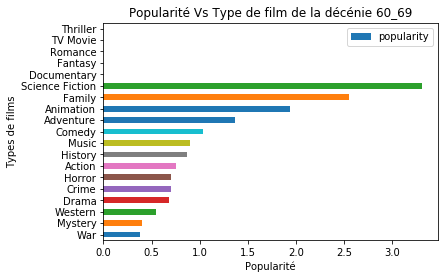

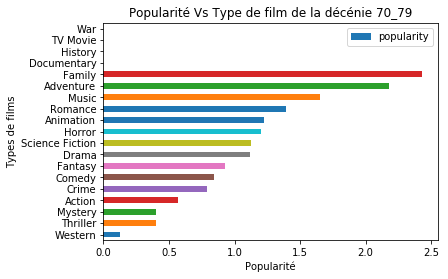

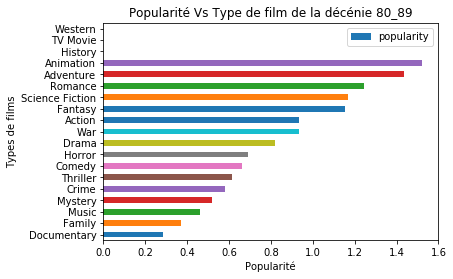

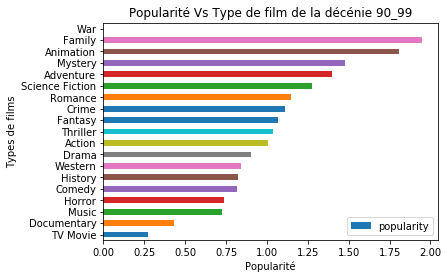

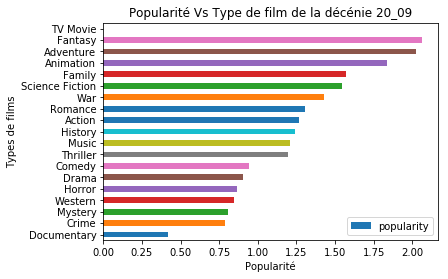

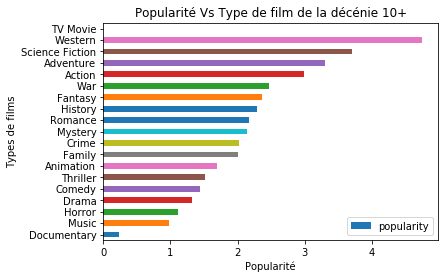

In [35]:
# Réalisation des graphiques des types de films et leurs popularités pour chaque décénie 
# à partir d'une boucle for.
for elt in [dec_60, dec_70, dec_80, dec_90, dec_20, dec_10_plus]:
    elt.plot.barh(x='genres', y='popularity')
    plt.title('Popularité Vs Type de film de la décénie'+" "+str(elt.decenie[0]))
    plt.xlabel('Popularité')
    plt.ylabel('Types de films')

In [36]:
#dec_60.plot.barh(x='genres', y='popularity')
#dec_70.plot.barh(x='genres', y='popularity')
#dec_80.plot.barh(x='genres', y='popularity')
#dec_90.plot.barh(x='genres', y='popularity')
#dec_20.plot.barh(x='genres', y='popularity')
#dec_10_plus.plot.barh(x='genres', y='popularity');

#### Commentaires:
Les films d'actions semblent être de plus en plus populaire au fil des années. Aussi, les films de type western, qui auraient perdues leur popularité, semblent revenir sur la scène au cours des deux dernières décénies.   

### Quels relations entre popularité, le revenu et le budget?

On s'instéressera aux varibles: `popularity', 'budget_adj','revenue_adj`

In [37]:
df_new=df[['popularity', 'budget_adj','revenue_adj']]

In [38]:
# Statistiques élémentaires 
df_new.describe()

,popularity,budget_adj,revenue_adj
count,3445.000000,3.445000e+03,3.445000e+03
mean,1.268127,4.680125e+07,1.484486e+08
std,1.533870,4.568443e+07,2.237649e+08
min,0.010335,9.693980e-01,2.861934e+00
25%,0.507078,1.500000e+07,2.336535e+07
50%,0.876503,3.245007e+07,7.121257e+07
75%,1.464555,6.420938e+07,1.775120e+08
max,32.985763,4.250000e+08,2.827124e+09


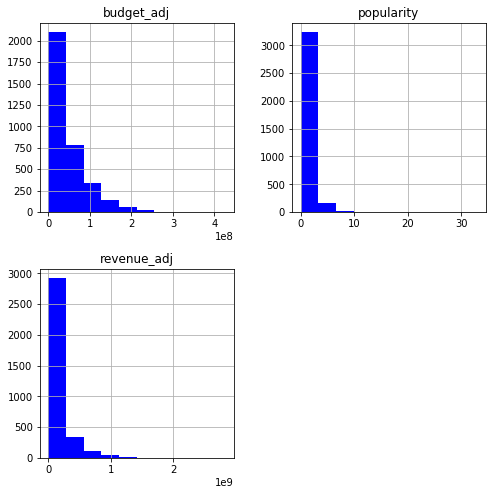

In [39]:
# Histogrammes des variables 
df_new.hist(figsize=(8,8), color='b'); 

In [40]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


In [41]:
# Définition d'une fonction pour le : Nuage de points popularité et revenue/budget
def df_scatter(df_new,var, titre):
    plt.scatter(x=df_new[var], y=df_new['popularity'], color='b')
    plt.xlabel(var)
    plt.ylabel('Popularité')
    plt.title(titre);

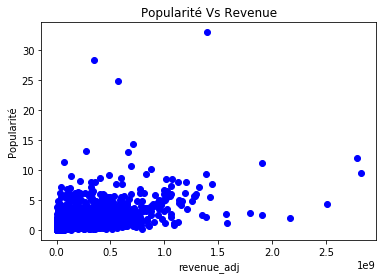

In [42]:
# Nuage de points popularité et revenue
df_scatter(df_new,'revenue_adj', 'Popularité Vs Revenue')

Il semble exister une rellation positive entre le revenue et la popularité.

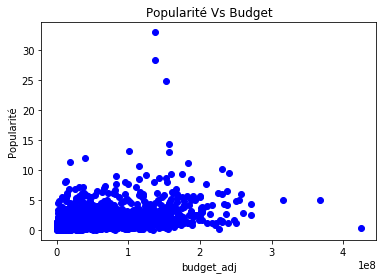

In [43]:
# Nuage de points popularité et revenue
df_scatter(df_new,'budget_adj', 'Popularité Vs Budget')

Il semble exister une rellation positive entre le budget et la popularité.

<a id='conclusions'></a>
## Conclusions
L'analyse exploratoire des données nous a permis d'identifier des types de films qui sont de plus en plus populaire (les films d'actions par exemple) et d'autres dont la popularité semble dimuner. De plus, on a remarqué qu'il pourrait exister un lien posivitif entre la popularité des films et le bubget consacré à leurs réalisations d'une part et également entre le revenu engendré par le film. 

Une principale limite dans notre analyse concerne les données manquantes. Après toute transformation, un total de **36857** de valeurs sont manquantes; cela constitue une grande limite pour de bonnes analyses. Surtout que les varibles d'intérêt `revenue_adj et budget_adj`sont concernées par ces valeurs manquantes, nos analyses pourraient être entachées d'erreurs. 
Il serait intéressant d'utiliser des méthodes performantes pour l'imputation des données manquantes.

Des recherches supplémentaires devraient être effectuer pour trouver des méthodes d'imputation des données manquantes beaucoup plus adadptées à notre contexte. 




In [44]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0

### Sources utilisées:
1- Cours Udacity
2- kaggle: TMDB 5000 Movie Dataset
3- kaggle: The Story of Film
4- GeeksforGeeks
5-Numpy: nupyrepeat
6-pandas: pandas.DataFrame.append
7- matplotlib:(Figure labels: suptitle, supxlabel, supylabel)
8-stackoverflow : How do I change the figure size with subplots?